In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [61]:
df = pd.read_csv("./Sample_data/diabetes.csv")

In [62]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [63]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [64]:
X = df[df.columns[:-1]].values
y = df[df.columns[-1]].values

In [65]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
data = np.hstack((X, np.reshape(y, (-1, 1))))
transformed_df = pd.DataFrame(data, columns=df.columns)

In [66]:
over = RandomOverSampler()
X, y = over.fit_resample(X,y)
data = np.hstack((X, np.reshape(y, (-1, 1))))
transformed_df = pd.DataFrame(data, columns=df.columns)

In [67]:
len(transformed_df[transformed_df["Outcome"]==1]), len(transformed_df[transformed_df["Outcome"]==0])

(500, 500)

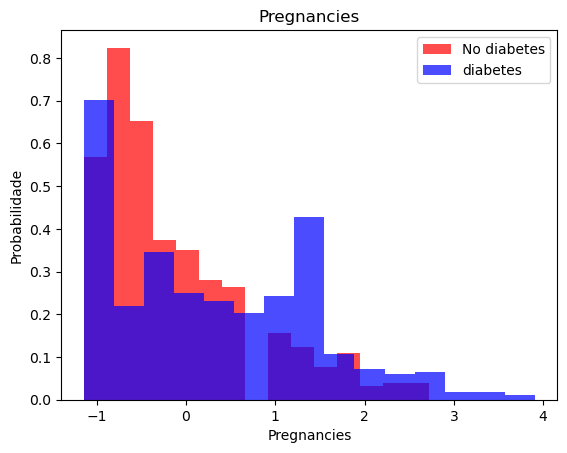

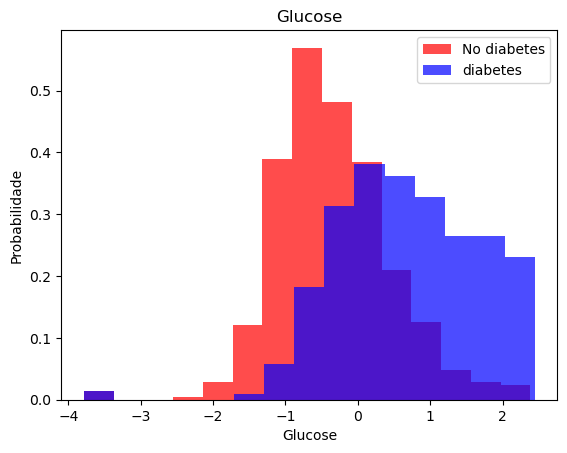

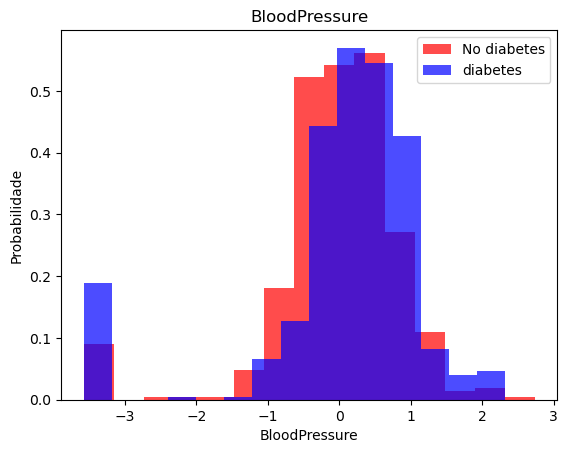

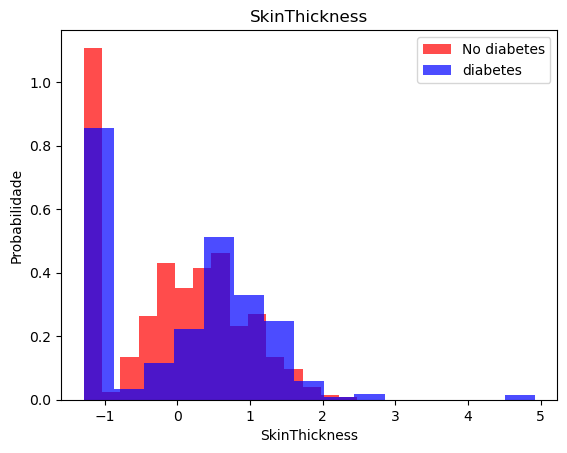

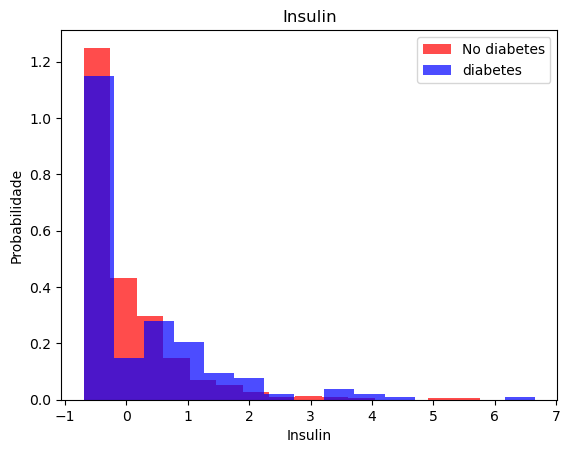

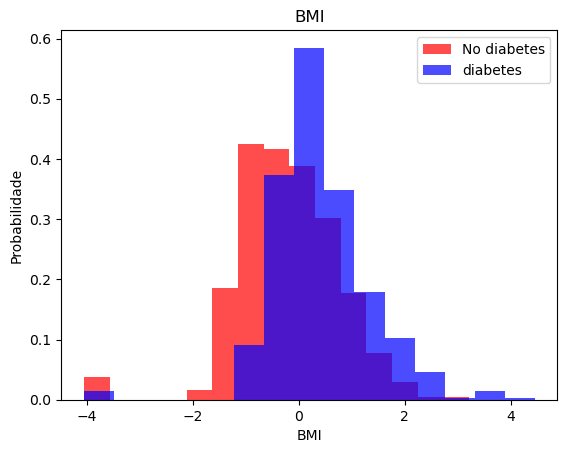

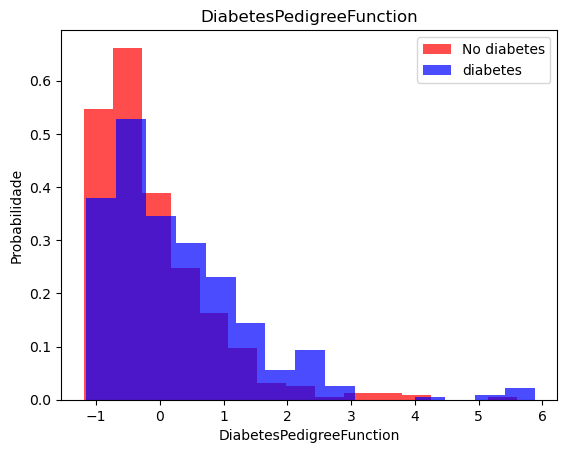

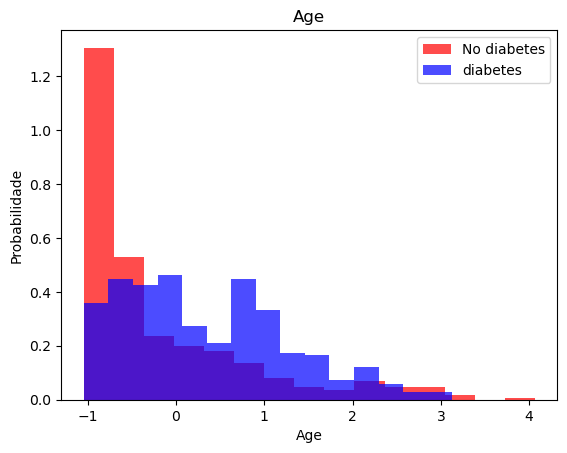

In [68]:
for i in range(len(df.columns[:-1])):
    label = df.columns[i]
    plt.hist(transformed_df[transformed_df['Outcome']==0][label],color='red', label='No diabetes', alpha=0.7,density=True, bins=15)
    plt.hist(transformed_df[transformed_df['Outcome']==1][label],color='blue', label='diabetes', alpha=0.7,density=True, bins=15)
    plt.title(label)
    plt.ylabel('Probabilidade')
    plt.xlabel(label)
    plt.legend()
    plt.show()


In [69]:
X_train, X_temp, y_train, y_temp = train_test_split(X,y, test_size=0.4, random_state=0)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp,y_temp, test_size=0.5, random_state=0)

In [70]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16,activation='relu'), #if x <= 0 --> 0, x > 0 --> x
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [71]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [72]:
model.evaluate(X_train,y_train)

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4602 - loss: 0.7920


[0.799771249294281, 0.4533333480358124]

In [73]:
model.evaluate(X_valid,y_valid)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4686 - loss: 0.8130


[0.820738673210144, 0.45500001311302185]

Treinar modelo

In [74]:
model.fit(X_train,y_train,batch_size=16,epochs=20, validation_data=(X_valid,y_valid))

Epoch 1/20


38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.4572 - loss: 0.7864 - val_accuracy: 0.5700 - val_loss: 0.7128
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5721 - loss: 0.7013 - val_accuracy: 0.6000 - val_loss: 0.6489
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6093 - loss: 0.6417 - val_accuracy: 0.6950 - val_loss: 0.6055
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6883 - loss: 0.6066 - val_accuracy: 0.7000 - val_loss: 0.5716
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6679 - loss: 0.5864 - val_accuracy: 0.7150 - val_loss: 0.5447
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7042 - loss: 0.5576 - val_accuracy: 0.7400 - val_loss: 0.5247
Epoch 7/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7091 - loss: 0.5621 - val_accuracy: 0.7750 - val_loss: 0.5105
Epoch 8/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7220 - loss: 0.5524 - val_accuracy: 0.7850 - val_loss: 0.4934
Epo

In [75]:
model.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7942 - loss: 0.4458


[0.4490800201892853, 0.7950000166893005]